In [1]:
# Import, read, and split data
import pandas as pd
data = pd.read_csv('quiz_data.csv')
import numpy as np

In [2]:
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

In [3]:
# Fix random seed
np.random.seed(55)

In [4]:
### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [5]:
### Logistic Regression
lr = LogisticRegression()

### Decision Tree
gb = GradientBoostingClassifier()

### Support Vector Machine
svc = SVC(kernel='rbf', gamma=1000)

In [6]:
# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

In [9]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

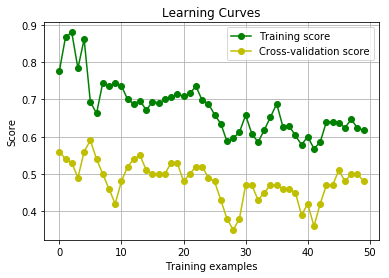

In [20]:
draw_learning_curves(X2, y2, lr, 50) # underfitting

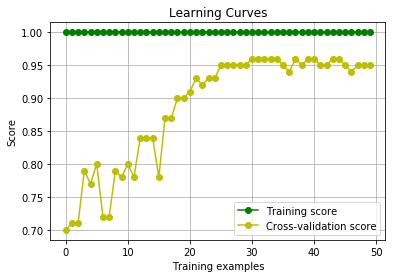

In [15]:
draw_learning_curves(X2, y2, gb, 50) # just right

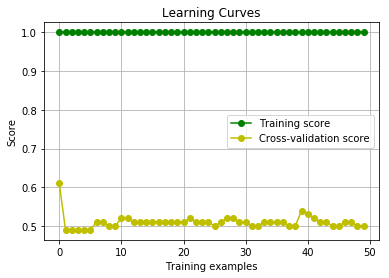

In [16]:
draw_learning_curves(X2, y2, svc, 50) # overfitting